In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
class Poly_Reg_MISC:
    
    def __init__(self, xi, yi, m):
        self.xi = xi
        self.yi = yi
        self.m = m
        
  
   #Build our matrix of features.  

    def marticeX(self):
        n = len(self.xi)
        A = np.zeros((n, self.m + 1))
        xi = self.xi
        for i in range(n):
            for j in range(self.m + 1):
                A[i,j] = self.xi[i]**j
        return A
    
    #Calculation of weights.
    
    def coef_(self):
        A = self.marticeX()
        X=(A.T)@A
        b=(A.T)@(self.yi)
        w=np.linalg.solve(X,b)
        return w
    
    #Horner function.
    
    def horner(self, w, x):
        n=len(w)-1
        b=w[n]
    
        for k in range(n-1,-1,-1):
            b=w[k]+b*x
        return b
    
    #Function used to valuate the polynomial.
    
    def predict_(self,x):
        A = self.marticeX()
        w = self.coef_()
        y = self.horner(w,x)
        return y

    #Error function 
    
    def error(self):
        w = self.coef_()
        xii = np.array(self.xi)
        erreur = sum((self.predict_(xii)-self.yi)**2)/2*len(self.xi)
        return erreur

In [3]:
    #Create our original function.
    def f(x):
        return 1/(1+x**2)
    f=np.vectorize(f)

In [4]:
x_min=-5
x_max=5
m=40
n=120

pas=(x_max-x_min)/(n-1)
xi=[pas*i+x_min for i in range(n)]
yi=[f(t)+random.random()/4 for t in xi]

reg_poly = Poly_Reg_MISC(xi,yi,m)

In [5]:
Mat = reg_poly.marticeX()
w = reg_poly.coef_()

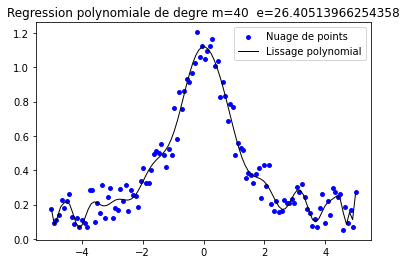

In [7]:
x=np.linspace(x_min,x_max,100)

yp = reg_poly.predict_(x)


erreur = reg_poly.error()


plt.scatter(xi,yi,c='b',s=15,label='Nuage de points')

plt.plot(x,yp,c='k',lw=1,label='Lissage polynomial')

plt.title('Regression polynomiale de degre m={}  e={}'.format(m,erreur) )
plt.legend()
plt.show()